# Bayes - recursive visualization

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 16}) 
import scipy.stats as stats
import savingfigR as sf

Let's see how likelihood and posterior change as we get more data. 

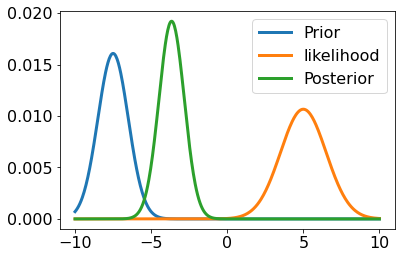

In [2]:
x = np.linspace(-10,10,500)

prior = stats.norm.pdf(x, -7.5, 1)
likelihood = stats.norm.pdf(x, 5, 1.5)

plt.figure()
plt.plot(x, prior / sum(prior), lw=3, label='Prior')
plt.plot(x, likelihood / sum(likelihood), lw=3, label='likelihood')
plt.plot(x, prior * likelihood / sum(prior * likelihood), lw=3, label='Posterior')
plt.legend(loc=0)
plt.show()

In [3]:
fnames = []
for t in range(10):

    fig = plt.figure()
    plt.plot(x, prior / sum(prior), lw=3, label='Prior')
    plt.plot(x, likelihood / sum(likelihood), lw=3, label='likelihood')
    posterior = prior * likelihood / sum(prior * likelihood)
    plt.plot(x, posterior, lw=3, label='Posterior')
    plt.xlabel('value')
    plt.ylabel('PDF')
    plt.legend(loc=0)
    plt.title(f'Trial {t:d}')
    
    filename = f'{t:d}.png'
    fnames.append(filename)
    sf.best_save(fig, filename)

    # update 
    prior = posterior

sf.writeGif('bayes', fnames, fps=1)